In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.impute import SimpleImputer as SI

In [22]:
df = pd.read_csv("BlackFriday.csv")

In [23]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [25]:
df.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [26]:
del df["Product_Category_2"]
del df["Product_Category_3"]

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     537577 non-null  int64 
 1   Product_ID                  537577 non-null  object
 2   Gender                      537577 non-null  object
 3   Age                         537577 non-null  object
 4   Occupation                  537577 non-null  int64 
 5   City_Category               537577 non-null  object
 6   Stay_In_Current_City_Years  537577 non-null  object
 7   Marital_Status              537577 non-null  int64 
 8   Product_Category_1          537577 non-null  int64 
 9   Purchase                    537577 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 41.0+ MB


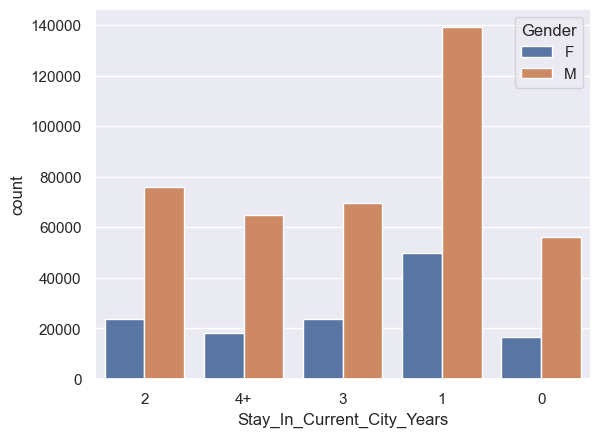

In [28]:
sns.set_theme()
sns.countplot(data = df, x = "Stay_In_Current_City_Years", hue = "Gender")
plt.show()

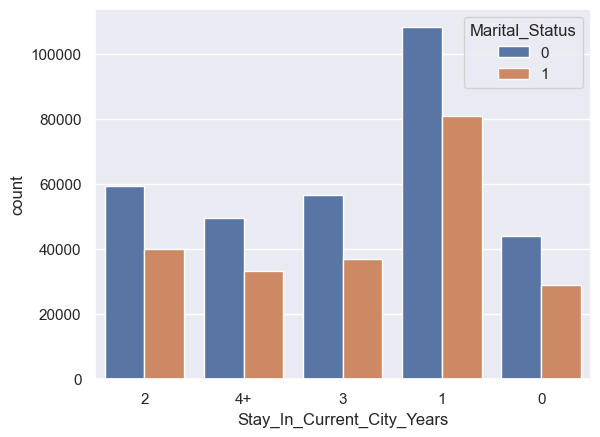

In [29]:
sns.countplot(data = df, x = "Stay_In_Current_City_Years", hue = "Marital_Status")
plt.show()

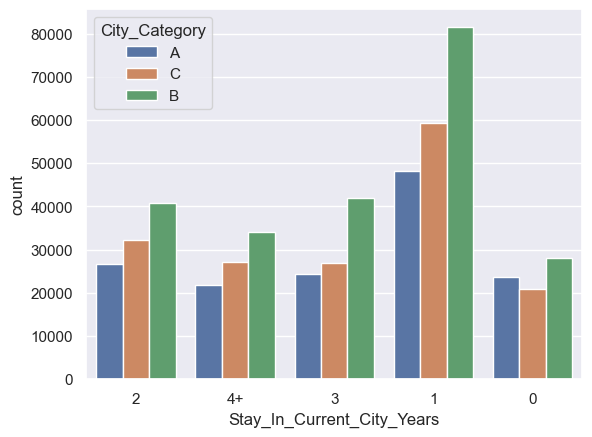

In [30]:
sns.countplot(data = df, x = "Stay_In_Current_City_Years", hue = "City_Category")
plt.show()

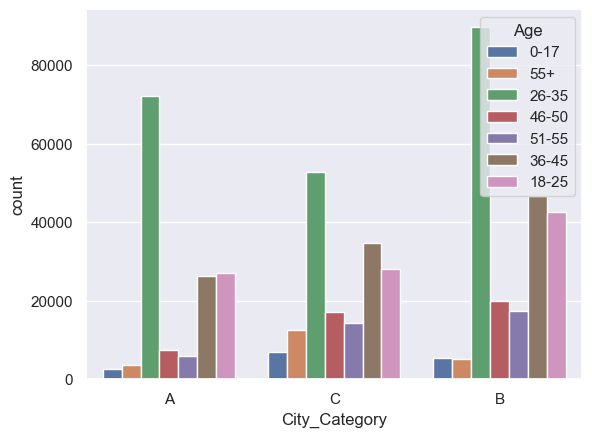

In [31]:
sns.countplot(data = df, x = "City_Category", hue = "Age")
plt.show()

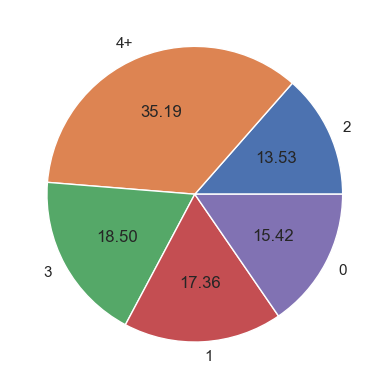

In [35]:
plt.pie(df.groupby(by=["Stay_In_Current_City_Years"]).size(), labels = df["Stay_In_Current_City_Years"].unique(), autopct = "%.2f")
plt.show()

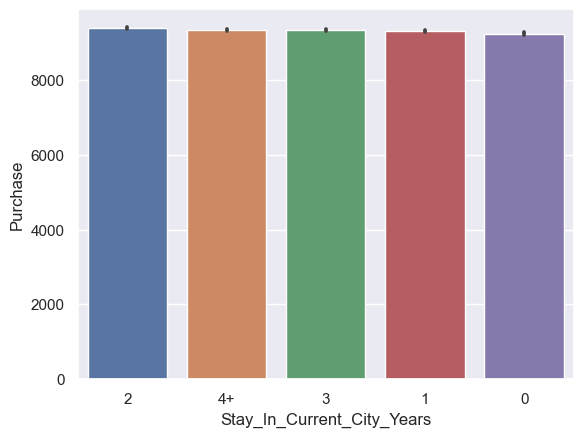

In [43]:
sns.barplot(data = df, x = "Stay_In_Current_City_Years", y="Purchase")
plt.show()

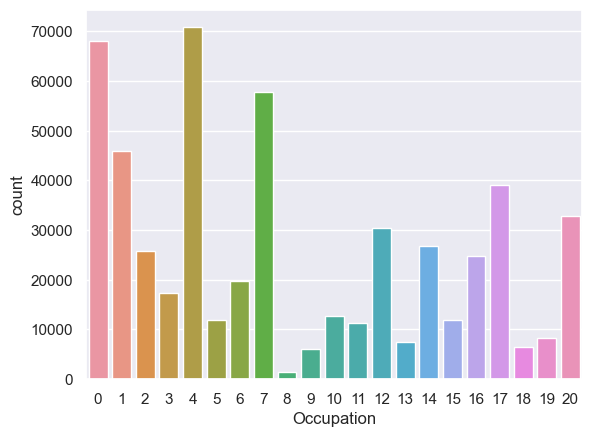

In [59]:
sns.countplot(data = df, x = "Occupation")
plt.show()

<Axes: xlabel='Occupation', ylabel='Purchase'>

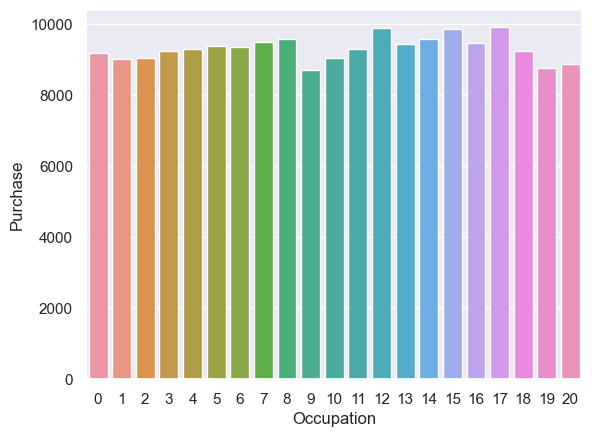

In [76]:
sns.barplot(data=df.groupby(by=["Occupation"])["Purchase"].mean().reset_index(), x="Occupation", y="Purchase")

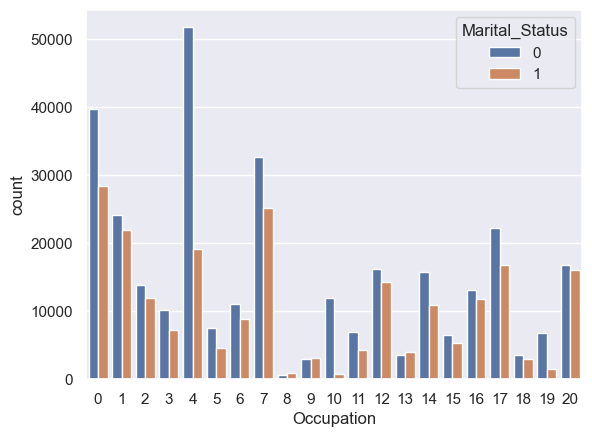

In [77]:
sns.countplot(data = df, x = "Occupation", hue = "Marital_Status")
plt.show()

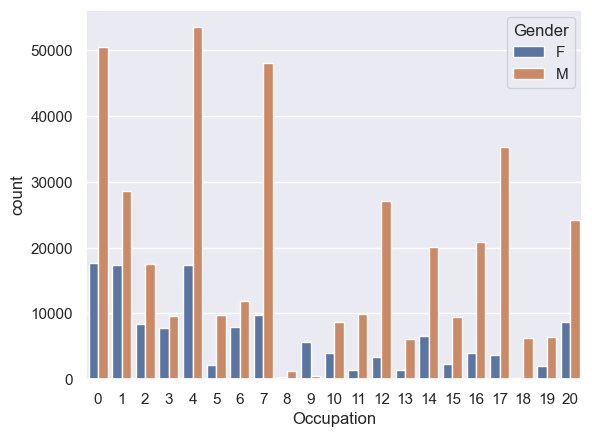

In [78]:
sns.countplot(data = df, x = "Occupation", hue = "Gender")
plt.show()

[]

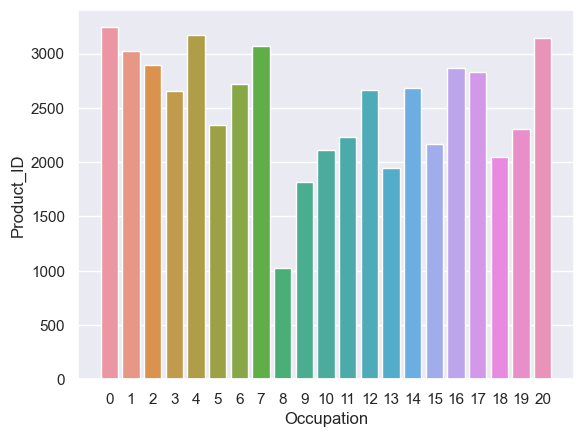

In [90]:
sns.barplot(data = df.groupby(by=["Occupation"])["Product_ID"].nunique().reset_index(), x = "Occupation", y = "Product_ID")
plt.plot()

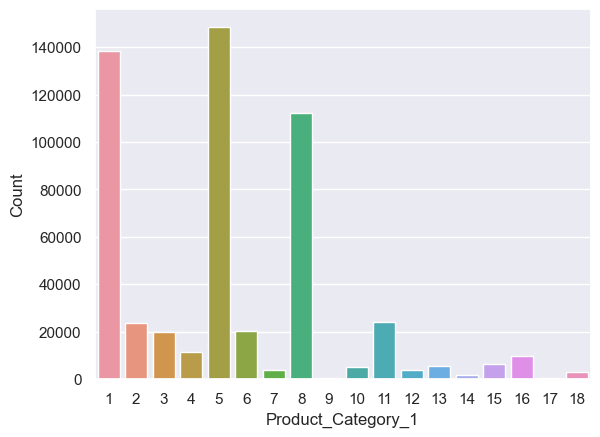

In [100]:
sns.barplot(data = df.groupby("Product_Category_1").size().reset_index(name="Count"), x = "Product_Category_1", y = "Count")
plt.show()

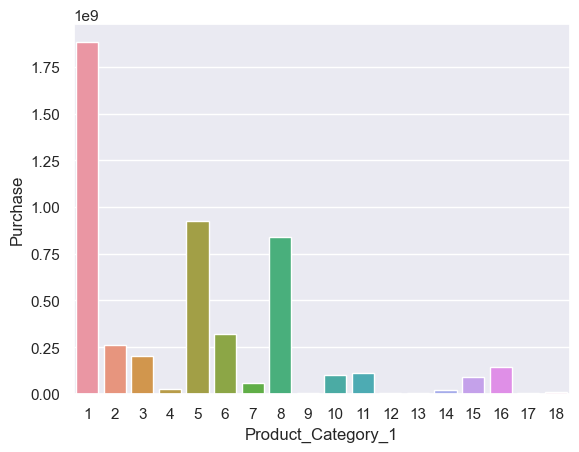

In [102]:
sns.barplot(data = df.groupby("Product_Category_1")["Purchase"].sum().reset_index(), x = "Product_Category_1", y = "Purchase")
plt.show()

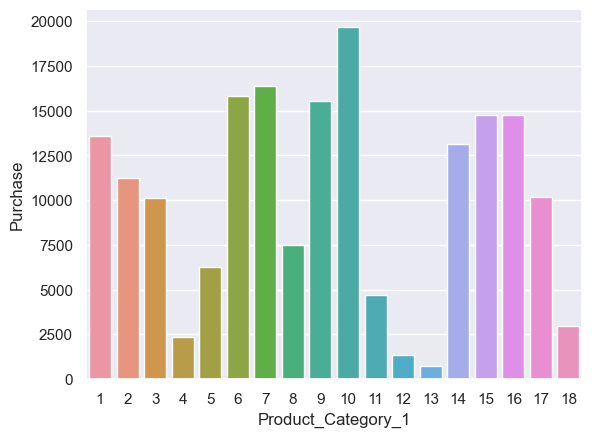

In [103]:
sns.barplot(data = df.groupby("Product_Category_1")["Purchase"].mean().reset_index(), x = "Product_Category_1", y = "Purchase")
plt.show()

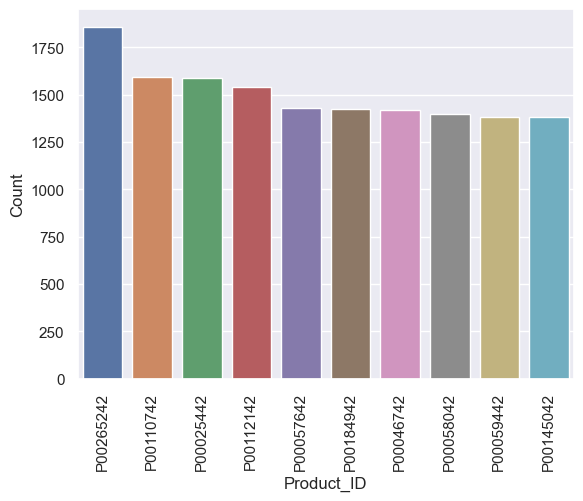

In [108]:
sns.barplot(data = df.groupby("Product_ID").size().nlargest(10).reset_index(name="Count"), x = "Product_ID", y = "Count")
plt.xticks(rotation = 90)
plt.show()